##Bài Toán: Dự đoán tình trạng tắc nghẽn giao thông tại Seatle , dựa trên dữ liệu thời tiết , va chạm , và một số sự kiện khác

##1.Định nghĩa bài toán

###1.1 Mục tiêu

Xây dựng mô hình phân loại để dự đoán mức độ tắc nghẽn giao thông tại Seattle (ít nghiệm trọng, nghiêm trọng, rất nghiêm trọng) dựa trên dữ liệu thời tiết, va chạm giao thông, thời gian, và các sự kiện đặc biệt.Mô hình giúp hỗ trợ cảnh báo sớm và điều phối giao thông hiệu quả.

###1.2 Bối cảnh giao thông tại Seattle

* Thành phố Seattle : là một trong những thành phố lớn của Mỹ, thường xuyên xảy ra tình trạng tắc nghẽn giao thông, đặc biệt vào giờ cao điểm hoặc khi có thời tiết xấu, tai nạn giao thông, hoặc sự kiện đông người.

* Hiện nay, việc điều phối giao thông chủ yếu dựa vào phản ứng sau khi sự cố xảy ra, chưa có hệ thống dự đoán trước tình trạng tắc nghẽn để hỗ trợ người tham gia giao thông và cơ quan quản lý.

* Bài toán đặt ra là làm sao tận dụng các nguồn dữ liệu sẵn có như thời tiết, va chạm giao thông, lịch sự kiện… để dự đoán trước mức độ tắc nghẽn, từ đó đưa ra cảnh báo và phương án điều phối hợp lý hơn.


##2.Các thư viện cần thiết

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##3.Thu thập dữ liệu

In [ ]:
# Đọc file dữ liệu :
df= pd.read_csv("/content/Collisions.csv")
df

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221261,-122.329060,47.605233,221262,318579,320079,E909186,Matched,Block,NaN,6TH AVE BETWEEN CHERRY ST AND COLUMBIA ST,...,Unknown,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221262,-122.314961,47.523468,221263,318368,319868,3780990,Matched,Block,NaN,14TH AVE S BETWEEN S CONCORD ST AND S HENDERSO...,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221263,-122.334203,47.575576,221264,318948,320448,E920056,Matched,Intersection,31379.0,1ST AVE S AND S HANFORD ST,...,Dry,Daylight,NaN,NaN,NaN,16,From same direction - one right turn - one str...,0,0,N
221264,-122.310259,47.594214,221265,319956,321456,3795268,Matched,Block,NaN,RAINIER AVE S BETWEEN S CHARLES N ST AND S CHA...,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


###3.2 Kiểm tra dữ liệu ban đầu

In [ ]:
print(f"Dữ liệu đã được tải với {df.shape[0]} dòng và {df.shape[1]} cột.")

Dữ liệu đã được tải với 221266 dòng và 40 cột.


In [ ]:
# Thông tin cơ bản
print("===== THÔNG TIN CƠ BẢN =====")
print(df.info())

===== THÔNG TIN CƠ BẢN =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT 

###3.3 Kiểm tra chất lượng dữ liệu

In [ ]:
# Kiểm tra và xử lý giá trị thiếu :
print("===== KIỂM TRA GIÁ TRỊ THIẾU =====")

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Gộp lại thành bảng dễ nhìn
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percent (%)': missing_percent
}).sort_values(by='Missing Values', ascending=False)

missing_df


===== KIỂM TRA GIÁ TRỊ THIẾU =====


,Missing Values,Percent (%)
PEDROWNOTGRNT,216078,97.655311
SPEEDING,211353,95.519872
EXCEPTRSNDESC,209491,94.678351
INATTENTIONIND,191078,86.356693
INTKEY,149443,67.539975
EXCEPTRSNCODE,120403,54.415500
SDOTCOLNUM,94061,42.510372
LIGHTCOND,26776,12.101272
WEATHER,26688,12.061501
ROADCOND,26608,12.025345


X: Tọa độ X (vị trí địa lý, kinh độ) của vụ va chạm.

Y: Tọa độ Y (vị trí địa lý, vĩ độ) của vụ va chạm.

OBJECTID: Mã định danh duy nhất cho mỗi bản ghi (sự kiện) trong dữ liệu.

INCKEY: Mã sự cố, dùng để nhận diện và tham chiếu đến từng vụ va chạm cụ thể.

COLDETKEY: Mã chi tiết va chạm, cung cấp thông tin chi tiết về vụ va chạm đó.

REPORTNO: Số báo cáo của sự cố, dùng để theo dõi và tìm kiếm trong hệ thống báo cáo.

STATUS: Trạng thái của vụ va chạm (ví dụ: "Matched" có thể có nghĩa là sự kiện đã được xác nhận).

ADDRTYPE: Loại địa chỉ của vụ va chạm (ví dụ: ngã tư, đoạn đường).

INTKEY: Mã giao lộ, liên quan đến vị trí ngã tư nơi xảy ra va chạm.

LOCATION: Mô tả vị trí xảy ra vụ va chạm (thường là tên các tuyến đường hoặc ngã tư).

EXCEPTRSNCODE: Mã lỗi ngoại lệ, chỉ các lỗi xảy ra trong quá trình xử lý thông tin của vụ va chạm.

EXCEPTRSNDESC: Mô tả chi tiết về lỗi ngoại lệ, nếu có.

SEVERITYCODE: Mã mức độ nghiêm trọng của vụ va chạm (ví dụ: nhẹ, nặng).

SEVERITYDESC: Mô tả chi tiết mức độ nghiêm trọng của vụ va chạm.

COLLISIONTYPE: Loại va chạm, mô tả cách thức va chạm xảy ra (ví dụ: xe rẽ trái va vào người đi bộ).

PERSONCOUNT: Số lượng người liên quan đến vụ va chạm (có thể là tài xế, hành khách, người đi bộ).

PEDCOUNT: Số lượng người đi bộ bị ảnh hưởng bởi vụ va chạm.

PEDCYLCOUNT: Số lượng người đi xe đạp bị ảnh hưởng bởi vụ va chạm.

VEHCOUNT: Số lượng phương tiện tham gia vào vụ va chạm.

INJURIES: Số người bị thương trong vụ va chạm.

SERIOUSINJURIES: Số người bị thương nặng trong vụ va chạm.

FATALITIES: Số người tử vong trong vụ va chạm.

INCDATE: Ngày xảy ra vụ va chạm.

INCDTTM: Thời gian cụ thể (ngày và giờ) xảy ra vụ va chạm.

JUNCTIONTYPE: Loại giao lộ nơi xảy ra va chạm (ví dụ: ngã tư, vòng xoay).

SDOT_COLCODE: Mã sự cố của Seattle Department of Transportation (SDOT), chỉ ra loại sự cố giao thông theo quy định của SDOT.

SDOT_COLDESC: Mô tả chi tiết sự cố của SDOT.

INATTENTIONIND: Chỉ số cho biết liệu vụ va chạm có liên quan đến việc lái xe mất tập trung không (ví dụ: sử dụng điện thoại di động).

UNDERINFL: Chỉ số cho biết liệu vụ va chạm có liên quan đến việc tài xế bị ảnh hưởng bởi rượu hoặc ma túy không.

WEATHER: Điều kiện thời tiết tại thời điểm xảy ra va chạm (ví dụ: mưa, nắng, sương mù).

ROADCOND: Tình trạng mặt đường tại thời điểm xảy ra va chạm (ví dụ: khô, ướt, có băng tuyết).

LIGHTCOND: Điều kiện ánh sáng tại thời điểm xảy ra va chạm (ví dụ: ban ngày, tối, đèn đường sáng).

PEDROWNOTGRNT: Liệu người đi bộ có được quyền ưu tiên tại vạch kẻ đường không.

SDOTCOLNUM: Mã số sự cố của SDOT, dùng để tham chiếu đến một sự cố trong hệ thống của SDOT.

SPEEDING: Liệu có vi phạm tốc độ liên quan đến vụ va chạm hay không.

ST_COLCODE: Mã sự cố mô tả chi tiết loại va chạm trên đường.

ST_COLDESC: Mô tả chi tiết sự cố trên đường (ví dụ: va chạm xe từ phía sau, va chạm do rẽ trái).

SEGLANEKEY: Mã phân đoạn làn đường liên quan đến vụ va chạm.

CROSSWALKKEY: Mã vạch kẻ qua đường nơi xảy ra va chạm.

HITPARKEDCAR: Chỉ ra liệu vụ va chạm có liên quan đến việc xe đâm vào xe đậu hay không.

*  Các cột với tỷ lệ thiếu dữ liệu cao:

EXCEPTRSNDESC: 98.7% giá trị thiếu.

PEDROWNOTGRNT: 97.6% giá trị thiếu.

EXCEPTRSNCODE: 95% giá trị thiếu.

SPEEDING: 94.6% giá trị thiếu.

INATTENTIONIND: 89.2% giá trị thiếu.

INTKEY: 68.7% giá trị thiếu.

Những cột này có tỷ lệ thiếu dữ liệu rất cao, có thể loại bỏ hoặc điền bằng giá trị khác (nếu cần thiết).

*  Các cột có tỷ lệ thiếu vừa phải:

ROADCOND, LIGHTCOND, WEATHER: Khoảng 7% giá trị thiếu.

ST_COLDESC, UNDERINFL, COLLISIONTYPE: Khoảng 7% giá trị thiếu.

Các cột này có thể là các cột quan trọng trong mô hình dự đoán. Bạn có thể xem xét điền giá trị thiếu bằng phương pháp như giá trị phổ biến nhất hoặc sử dụng các kỹ thuật khác như mô hình dự đoán.

*  Các cột với tỷ lệ thiếu thấp:

LOCATION, JUNCTIONTYPE, ADDRTYPE: Khoảng 1-3% giá trị thiếu.

SDOT_COLCODE, HITPARKEDCAR, SEGLANEKEY, CROSSWALKKEY, SDOT_COLDESC: Tất cả có chỉ 1 giá trị thiếu (0.001%).

Các cột này có tỷ lệ thiếu thấp và có thể dễ dàng điền giá trị thiếu.

*  Các cột không có giá trị thiếu:

STATUS, REPORTNO, COLDETKEY, INCKEY, OBJECTID, INCDTTM, FATALITIES, INCDATE, PERSONCOUNT, SEVERITYDESC, SEVERITYCODE, SERIOUSINJURIES, INJURIES, VEHCOUNT, PEDCYLCOUNT, PEDCOUNT: Không có giá trị thiếu (tỷ lệ thiếu = 0%).

In [ ]:
# Thống kê mô tả cho các biến số (kiểu int và float)
describe_df = df.describe()
describe_df

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,213797.000000,213797.000000,221266.000000,221266.000000,221266.000000,71823.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221265.000000,1.272050e+05,221266.000000,2.212660e+05
mean,-122.330752,47.620205,110633.500000,144603.603179,144831.128840,37616.272768,2.226230,0.038103,0.027293,1.728544,0.373844,0.015149,0.001681,13.383558,7.971063e+06,261.441573,9.588454e+03
std,0.030054,0.056040,63874.136669,89039.925169,89413.579421,51905.450406,1.470364,0.201745,0.164345,0.831224,0.732086,0.157908,0.044562,7.302961,2.611523e+06,3248.850406,7.150262e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577302,55317.250000,71603.250000,71603.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616053,110633.500000,127122.500000,127122.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,165949.750000,209654.750000,209874.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221266.000000,333683.000000,335183.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [ ]:
# Các trường dữ liệu không liên quan đến bài toán đưa ra :
columns_to_drop = [
    'PEDROWNOTGRNT','X','Y', 'EXCEPTRSNDESC','INCKEY', 'INTKEY',
    'EXCEPTRSNCODE', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
    'STATUS', 'REPORTNO', 'OBJECTID', 'COLDETKEY', 'SDOT_COLCODE', 'SDOT_COLDESC'
]

# Xóa các cột không cần thiết
df_cleaned = df.drop(columns=columns_to_drop)

# Hiển thị kích thước mới của DataFrame
df_cleaned.shape

(221266, 22)

PEDROWNOTGRNT: Cột này cho biết liệu người đi bộ có được quyền ưu tiên khi qua đường không. Dữ liệu này có thể không liên quan trực tiếp đến mức độ tắc nghẽn giao thông.

X, Y: Các tọa độ địa lý (kinh độ và vĩ độ) của vụ tai nạn. Mặc dù quan trọng cho việc xác định vị trí, nhưng trong bài toán này, các cột như ADDRTYPE và LOCATION có thể cung cấp thông tin vị trí tương đương mà không cần phải sử dụng tọa độ.

EXCEPTRSNDESC: Mô tả lỗi ngoại lệ khi xử lý dữ liệu vụ tai nạn. Cột này có thể không mang lại giá trị trong việc dự đoán tắc nghẽn giao thông.

INCKEY: Mã sự cố, dùng để tham chiếu đến từng vụ tai nạn. Mặc dù nó là một mã duy nhất cho mỗi vụ, nhưng nó không chứa thông tin hữu ích cho việc dự đoán tắc nghẽn giao thông.

INTKEY: Mã giao lộ. Có thể không có liên quan trực tiếp đến mức độ tắc nghẽn giao thông trong khi dự đoán, vì các thông tin về giao lộ có thể được truyền đạt qua các biến khác như JUNCTIONTYPE.

EXCEPTRSNCODE: Mã lỗi ngoại lệ trong quá trình xử lý thông tin sự cố. Dữ liệu này có thể không cần thiết cho bài toán dự đoán tắc nghẽn.

SDOTCOLNUM: Mã số sự cố của Seattle Department of Transportation. Đây là thông tin chi tiết về sự cố, nhưng không chắc chắn hữu ích cho việc dự đoán tình trạng tắc nghẽn giao thông.

ST_COLCODE, ST_COLDESC: Mã và mô tả sự cố của sự cố giao thông. Dữ liệu này có thể là chi tiết của vụ tai nạn, nhưng không ảnh hưởng nhiều đến việc dự đoán tắc nghẽn giao thông tổng thể.

SEGLANEKEY: Mã phân đoạn làn đường, không phải yếu tố chính ảnh hưởng đến dự đoán tắc nghẽn giao thông.

CROSSWALKKEY: Mã vạch kẻ qua đường, có thể không quan trọng đối với việc dự đoán tắc nghẽn giao thông.

STATUS: Trạng thái của vụ tai nạn (ví dụ: "Matched"). Thông tin này có thể không cần thiết trong việc dự đoán mức độ tắc nghẽn giao thông.

REPORTNO: Số báo cáo vụ tai nạn. Mặc dù giúp theo dõi các vụ tai nạn, nhưng nó không ảnh hưởng trực tiếp đến mức độ tắc nghẽn.

OBJECTID, COLDETKEY: Các mã định danh duy nhất cho mỗi bản ghi trong dữ liệu. Chúng chỉ là các chỉ số duy nhất cho mỗi vụ va chạm và không đóng góp vào việc dự đoán mức độ tắc nghẽn giao thông.

SDOT_COLCODE, SDOT_COLDESC: Các mã sự cố và mô tả sự cố do Seattle Department of Transportation cung cấp. Không cần thiết cho bài toán dự đoán tình trạng tắc nghẽn.

In [ ]:
#các tên code sau khi chọn loc dữ liệu
remaining_columns = df_cleaned.columns.tolist()
remaining_columns

['ADDRTYPE',
 'LOCATION',
 'SEVERITYCODE',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INJURIES',
 'SERIOUSINJURIES',
 'FATALITIES',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'HITPARKEDCAR']

ADDRTYPE: Loại địa chỉ của vụ tai nạn (ví dụ: ngã tư, đoạn đường). Cung cấp thông tin về loại vị trí nơi xảy ra tai nạn.

LOCATION: Vị trí cụ thể nơi xảy ra vụ va chạm (thường là tên các tuyến đường hoặc ngã tư). Biến này cung cấp thông tin về vị trí địa lý của vụ tai nạn.

SEVERITYCODE: Mã mức độ nghiêm trọng của vụ tai nạn (ví dụ: nhẹ, nặng). Đây là biến mục tiêu trong bài toán phân loại và dùng để dự đoán mức độ tắc nghẽn giao thông.

SEVERITYDESC: Mô tả chi tiết mức độ nghiêm trọng của vụ tai nạn (ví dụ: không bị thương, bị thương nhẹ, tử vong). Cung cấp thông tin mô tả về mức độ nghiêm trọng của vụ tai nạn.

COLLISIONTYPE: Loại va chạm, mô tả cách thức va chạm xảy ra (ví dụ: xe rẽ trái va vào người đi bộ). Biến này mô tả các kiểu va chạm khác nhau và có thể ảnh hưởng đến mức độ tắc nghẽn.

PERSONCOUNT: Số lượng người liên quan đến vụ tai nạn (có thể là tài xế, hành khách, người đi bộ). Biến này cho biết tổng số người bị ảnh hưởng trong một vụ tai nạn.

PEDCOUNT: Số lượng người đi bộ bị ảnh hưởng trong vụ tai nạn. Cung cấp thông tin về sự tham gia của người đi bộ trong các vụ tai nạn giao thông.

PEDCYLCOUNT: Số lượng người đi xe đạp bị ảnh hưởng trong vụ tai nạn. Tương tự như PEDCOUNT, nhưng chỉ liên quan đến người đi xe đạp.

VEHCOUNT: Số lượng phương tiện tham gia vào vụ tai nạn. Biến này cho biết số lượng phương tiện có liên quan trong vụ tai nạn và có thể ảnh hưởng đến mức độ tắc nghẽn.

INJURIES: Số người bị thương trong vụ tai nạn. Cung cấp thông tin về số lượng người bị thương, có thể là một chỉ báo về mức độ nghiêm trọng của vụ tai nạn.

SERIOUSINJURIES: Số người bị thương nặng trong vụ tai nạn. Đây là một biến quan trọng trong việc đánh giá mức độ nghiêm trọng của vụ tai nạn và có thể ảnh hưởng đến dự đoán tắc nghẽn giao thông.

FATALITIES: Số người tử vong trong vụ tai nạn. Đây là yếu tố quan trọng ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn và có thể làm tăng mức độ tắc nghẽn giao thông.

INCDATE: Ngày xảy ra vụ tai nạn. Biến này giúp xác định thời điểm xảy ra tai nạn và có thể liên quan đến yếu tố thời gian như giờ cao điểm.

INCDTTM: Thời gian cụ thể (ngày và giờ) xảy ra vụ tai nạn. Cung cấp thông tin chi tiết về thời gian và có thể được sử dụng để phân tích tắc nghẽn giao thông theo thời gian.

JUNCTIONTYPE: Loại giao lộ nơi xảy ra vụ tai nạn (ví dụ: ngã tư, vòng xoay). Biến này có thể ảnh hưởng đến mức độ tắc nghẽn giao thông do các giao lộ có thể gây ùn tắc.

INATTENTIONIND: Chỉ số cho biết liệu vụ tai nạn có liên quan đến việc lái xe mất tập trung không (ví dụ: sử dụng điện thoại di động). Đây là một yếu tố quan trọng có thể ảnh hưởng đến độ nghiêm trọng của tai nạn.

UNDERINFL: Chỉ số cho biết liệu vụ tai nạn có liên quan đến việc tài xế bị ảnh hưởng bởi rượu hoặc ma túy không. Biến này giúp xác định tình trạng lái xe khi xảy ra tai nạn, có thể liên quan đến mức độ nghiêm trọng.

WEATHER: Điều kiện thời tiết tại thời điểm xảy ra vụ tai nạn (ví dụ: mưa, nắng, sương mù). Thời tiết có thể ảnh hưởng đến sự di chuyển và độ an toàn của giao thông.

ROADCOND: Tình trạng mặt đường tại thời điểm xảy ra vụ tai nạn (ví dụ: khô, ướt, có băng tuyết). Điều kiện mặt đường là một yếu tố quan trọng trong việc xác định mức độ nguy hiểm và tắc nghẽn giao thông.

LIGHTCOND: Điều kiện ánh sáng tại thời điểm xảy ra vụ tai nạn (ví dụ: ban ngày, tối, đèn đường sáng). Điều kiện ánh sáng có thể ảnh hưởng đến tầm nhìn và nguy cơ xảy ra tai nạn.

SPEEDING: Liệu có vi phạm tốc độ liên quan đến vụ tai nạn hay không. Vi phạm tốc độ có thể là yếu tố gây ra tai nạn nghiêm trọng, làm tăng mức độ tắc nghẽn giao thông.

HITPARKEDCAR: Liệu vụ tai nạn có liên quan đến việc xe đâm vào xe đậu hay không. Đây có thể là một yếu tố đặc biệt trong việc dự đoán mức độ tắc nghẽn tại các khu vực có nhiều xe đậu.

In [ ]:
# Kiểm tra số lượng giá trị thiếu trong từng cột
missing_values = df_cleaned.isnull().sum()

# Chỉ hiển thị các cột còn thiếu giá trị
missing_values = missing_values[missing_values > 0]

# Sắp xếp theo số lượng thiếu giảm dần
missing_values = missing_values.sort_values(ascending=False)

# Hiển thị
print("Các cột còn thiếu giá trị sau khi xoá cột không liên quan:")
print(missing_values)


Các cột còn thiếu giá trị sau khi xoá cột không liên quan:
SPEEDING          211353
INATTENTIONIND    191078
LIGHTCOND          26776
WEATHER            26688
ROADCOND           26608
COLLISIONTYPE      26499
UNDERINFL          26479
JUNCTIONTYPE       11967
LOCATION            4586
ADDRTYPE            3712
SEVERITYCODE           1
dtype: int64


##4.Tiền xử lý dữ liệu

###4.1 xử lý các giá trị còn thiếu

In [ ]:
# Loại bỏ 1 giá trị còn thiếu của biến SEVERITYCODE
df_cleaned = df_cleaned.dropna(subset=['SEVERITYCODE'])
# Điền các ô trống trong cột SPEEDING bằng 'N'
df_cleaned['SPEEDING'] = df_cleaned['SPEEDING'].fillna('N')
#Cột này chỉ có "Y" hoặc trống → trống nghĩa là "không mất tập trung" → điền 'N'.
df_cleaned['INATTENTIONIND'] = df_cleaned['INATTENTIONIND'].fillna('N')
#Đây là các cột phân loại → dùng giá trị phổ biến nhất để điền
for col in ['LIGHTCOND', 'WEATHER', 'ROADCOND']:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
#dùng giá trị phổ biến nhất để điền
df_cleaned['COLLISIONTYPE'] = df_cleaned['COLLISIONTYPE'].fillna(df_cleaned['COLLISIONTYPE'].mode()[0])
#Nếu ô trống, hiểu là "không dùng chất kích thích" → điền 'N'.
df_cleaned['UNDERINFL'] = df_cleaned['UNDERINFL'].fillna('N')
#dùng giá trị phổ biến nhất để điền
df_cleaned['JUNCTIONTYPE'] = df_cleaned['JUNCTIONTYPE'].fillna(df_cleaned['JUNCTIONTYPE'].mode()[0])
#Điền bằng mode vì đây là thông tin quan trọng (Intersection/Block)
df_cleaned['ADDRTYPE'] = df_cleaned['ADDRTYPE'].fillna(df_cleaned['ADDRTYPE'].mode()[0])
#tách tên đường chính từ cột LOCATION và lưu vào cột mới MAIN_STREET.
df_cleaned['LOCATION'] = df_cleaned['LOCATION'].fillna('Unknown')
df_cleaned['MAIN_STREET'] = df_cleaned['LOCATION'].str.split('&').str[0].str.strip()
df_cleaned = df_cleaned.dropna(subset=['HITPARKEDCAR'])

<ipython-input-8-77b723a3f857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SPEEDING'] = df_cleaned['SPEEDING'].fillna('N')
<ipython-input-8-77b723a3f857>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['INATTENTIONIND'] = df_cleaned['INATTENTIONIND'].fillna('N')
<ipython-input-8-77b723a3f857>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

###4.2 Xử lý dữ liệu thời gian

In [ ]:
# Loại bỏ các dòng có giá trị 'unknown' và 'other' trong các cột cần thiết
df_cleaned = df_cleaned[~df_cleaned['WEATHER'].isin(['unknown', 'other'])]
df_cleaned = df_cleaned[~df_cleaned['ROADCOND'].isin(['unknown', 'other'])]
df_cleaned = df_cleaned[~df_cleaned['LIGHTCOND'].isin(['unknown', 'other'])]

# Loại bỏ các dòng có INCDTTM là NaT (giá trị thời gian không hợp lệ)
df_cleaned = df_cleaned.dropna(subset=['INCDTTM'])

# Chuyển cột INCDTTM sang định dạng datetime (nếu chưa được chuyển)
df_cleaned['INCDTTM'] = pd.to_datetime(df_cleaned['INCDTTM'], errors='coerce')

# Kiểm tra xem INCDTTM có còn giá trị NaT không (nếu có lỗi chuyển đổi)
df_cleaned = df_cleaned.dropna(subset=['INCDTTM'])  # Loại bỏ lại các dòng có NaT sau khi chuyển

# Tạo các cột mới từ thời gian
df_cleaned['Hour'] = df_cleaned['INCDTTM'].dt.hour  # Giờ trong ngày (0 - 23)
df_cleaned['DayOfWeek'] = df_cleaned['INCDTTM'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df_cleaned['Day'] = df_cleaned['INCDTTM'].dt.day  # Ngày trong tháng (1 - 31)
df_cleaned['Month'] = df_cleaned['INCDTTM'].dt.month  # Tháng trong năm (1 - 12)

# Kiểm tra 5 dòng đầu tiên để xác nhận kết quả
print("\n5 dòng đầu tiên sau khi tạo các cột thời gian:\n", df_cleaned[['INCDTTM', 'Hour', 'DayOfWeek', 'Day', 'Month']].head())

# Kiểm tra lại các cột thời gian sau khi tạo
time_columns_check_after = df_cleaned[['INCDTTM', 'Hour', 'DayOfWeek', 'Day', 'Month']].isnull().sum()
print("\nKiểm tra các cột thời gian sau khi tạo:\n", time_columns_check_after)



5 dòng đầu tiên sau khi tạo các cột thời gian:
               INCDTTM  Hour  DayOfWeek  Day  Month
0 2019-11-20 10:25:00    10          2   20     11
1 2019-11-18 17:01:00    17          0   18     11
2 2020-02-20 08:42:00     8          3   20      2
6 2019-06-16 01:07:00     1          6   16      6
7 2013-03-28 14:55:00    14          3   28      3

Kiểm tra các cột thời gian sau khi tạo:
 INCDTTM      0
Hour         0
DayOfWeek    0
Day          0
Month        0
dtype: int64


<ipython-input-9-6dc8c756d32c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = df_cleaned['INCDTTM'].dt.hour  # Giờ trong ngày (0 - 23)
<ipython-input-9-6dc8c756d32c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DayOfWeek'] = df_cleaned['INCDTTM'].dt.dayofweek  # 0 = Monday, 6 = Sunday
<ipython-input-9-6dc8c756d32c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

###4.3 kiểm tra các giá trị sau khi xử lý

In [ ]:
# Kiểm tra lại các giá trị thiếu sau khi xử lý
print("\nKiểm tra các giá trị thiếu sau khi xử lý:\n", df_cleaned.isnull().sum())


Kiểm tra các giá trị thiếu sau khi xử lý:
 ADDRTYPE           0
LOCATION           0
SEVERITYCODE       0
SEVERITYDESC       0
COLLISIONTYPE      0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
INCDATE            0
INCDTTM            0
JUNCTIONTYPE       0
INATTENTIONIND     0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
SPEEDING           0
HITPARKEDCAR       0
MAIN_STREET        0
Hour               0
DayOfWeek          0
Day                0
Month              0
dtype: int64


###4.4 Phân tích và chuẩn hoá biến mục tiêu

In [ ]:
# Phân tích giá trị duy nhất trong SEVERITYCODE
severity_counts = df_cleaned[['SEVERITYCODE']].value_counts().reset_index(name='Count')
print("\nPhân tích SEVERITYCODE : ")
severity_counts

# Loại bỏ các dòng có SEVERITYCODE là '0'
df_cleaned = df_cleaned[df_cleaned['SEVERITYCODE'] != '0']

# Thay thế '2b' bằng '2' trong SEVERITYCODE
df_cleaned['SEVERITYCODE'] = df_cleaned['SEVERITYCODE'].replace('2b', '2')

# Chuyển SEVERITYCODE về kiểu số nguyên
df_cleaned['SEVERITYCODE'] = df_cleaned['SEVERITYCODE'].astype(int)

# Kiểm tra lại giá trị duy nhất trong SEVERITYCODE sau khi chuẩn hóa
unique_severity = df_cleaned['SEVERITYCODE'].value_counts().sort_index()
unique_severity




Phân tích SEVERITYCODE : 


,count
SEVERITYCODE,
1,115398
2,53016
3,292


##5.Phân tích khám phá dữ liệu

###5.1 Biến mục tiêu

<ipython-input-12-1652f615ebb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SEVERITYCODE', data=df_cleaned, palette='pastel')


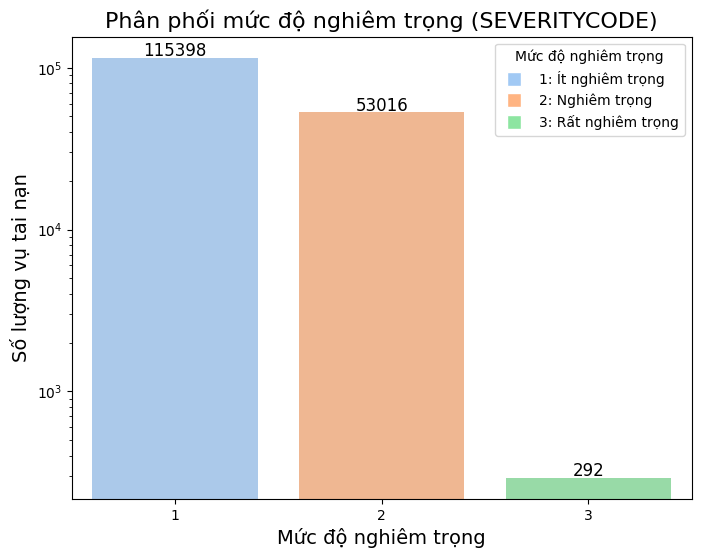

In [ ]:
# Tiểu mục 1: Kiểm tra phân phối của biến mục tiêu SEVERITYCODE
plt.figure(figsize=(8, 6))  # Tạo một biểu đồ mới với kích thước 8x6 inches

# Vẽ biểu đồ cột (countplot) để hiển thị phân phối của biến SEVERITYCODE
ax = sns.countplot(x='SEVERITYCODE', data=df_cleaned, palette='pastel')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân phối mức độ nghiêm trọng (SEVERITYCODE)', fontsize=16)
# Đặt nhãn cho trục x (biến mục tiêu SEVERITYCODE)
plt.xlabel('Mức độ nghiêm trọng', fontsize=14)
# Đặt nhãn cho trục y (số lượng vụ tai nạn)
plt.ylabel('Số lượng vụ tai nạn', fontsize=14)

# Thay đổi thang đo cho trục y thành log
plt.yscale('log')

# Tạo bảng chú thích với màu sắc và giá trị cho SEVERITYCODE
handles = []
labels = ['1: Ít nghiêm trọng', '2: Nghiêm trọng', '3: Rất nghiêm trọng']
colors = sns.color_palette('pastel', 3)  # Sử dụng bảng màu pastel với 3 màu

for color, label in zip(colors, labels):
    handles.append(plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10))

# Hiển thị bảng chú thích
plt.legend(handles=handles, labels=labels, title='Mức độ nghiêm trọng', loc='upper right')

# Thêm số liệu vào các cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Hiển thị giá trị
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Tọa độ của văn bản
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Hiển thị biểu đồ
plt.show()


Biểu đồ này biểu thị phân phối mức độ nghiêm trọng của các vụ tai nạn giao thông tại Seattle. Dưới đây là các nhận xét chi tiết giúp người đọc hiểu rõ hơn về biểu đồ:

Mục đích biểu đồ:
Biểu đồ này thể hiện số lượng các vụ tai nạn giao thông phân loại theo mức độ nghiêm trọng (mã SEVERITYCODE) của từng vụ tai nạn tại Seattle.

Các mức độ nghiêm trọng:
Mức độ 1 – Ít nghiêm trọng (Xanh da trời): Đây là mức độ xảy ra nhiều nhất với 33,699 vụ tai nạn. Các vụ này thường liên quan đến thiệt hại nhỏ hoặc không gây thương tích nặng. Chúng có thể là những va chạm nhỏ hoặc các tình huống không làm ảnh hưởng quá nhiều đến giao thông.

Mức độ 2 – Nghiêm trọng (Cam): 14,511 vụ thuộc mức độ này. Các vụ tai nạn này có thể gây thương tích nhẹ đến nghiêm trọng, yêu cầu chăm sóc y tế. Mặc dù không phải là vụ tai nạn nghiêm trọng nhất, nhưng chúng vẫn có thể tạo ra sự tắc nghẽn giao thông đáng kể.

Mức độ 3 – Rất nghiêm trọng (Xanh lá cây): 89 vụ thuộc mức độ này. Đây là những vụ tai nạn rất nghiêm trọng, có thể liên quan đến tử vong hoặc thương tích nặng. Mặc dù chỉ chiếm một tỷ lệ rất nhỏ (chưa đến 1% của tổng số vụ tai nạn), nhưng những vụ này gây ra sự tắc nghẽn giao thông lớn và cần sự xử lý khẩn cấp.

Tổng kết:
Biểu đồ cho thấy phần lớn các vụ tai nạn (khoảng 85%) có mức độ nghiêm trọng thấp (mức 1), trong khi các vụ tai nạn rất nghiêm trọng (mức 3) rất hiếm (chỉ chiếm 0.1% tổng số vụ).

Mặc dù số lượng vụ tai nạn ít nghiêm trọng là cao nhất, nhưng những vụ rất nghiêm trọng lại có ảnh hưởng lớn đến tình trạng giao thông và cần được ưu tiên xử lý sớm.

Việc hiểu được tỷ lệ và phân loại này giúp các cơ quan chức năng có thể tập trung vào việc giảm thiểu các vụ tai nạn nghiêm trọng, đồng thời xử lý các tình huống nhẹ hơn một cách hiệu quả.

###5.2 biểu đồ phân tích mức độ nghiêm trọng của WEATHER,ROADCOND,LIGHTCOND

###5.2.1 biểu đồ phân tích mức độ nghiêm trọng của WEATHER

WEATHER_GROUP
Thời tiết tốt      124107
Mưa/Tuyết           30373
Không khí kém         578
Khó khăn về gió        25
Name: count, dtype: int64


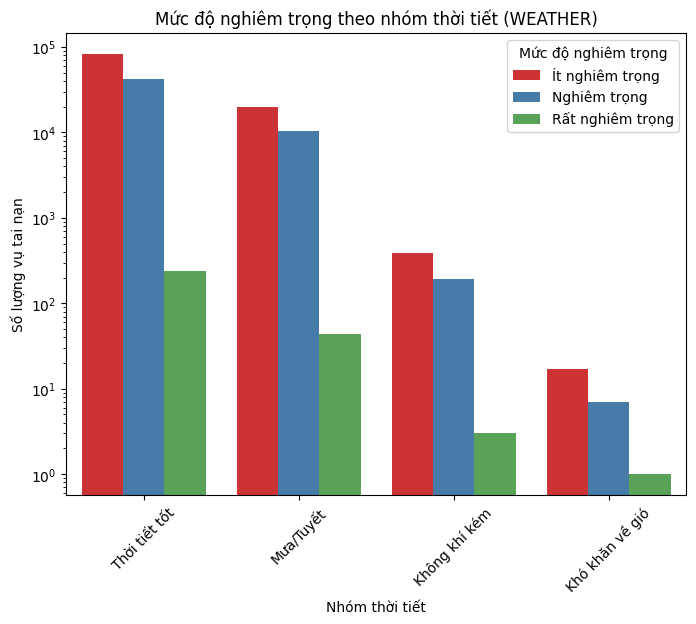

In [ ]:
# Gộp các giá trị WEATHER thành các nhóm
weather_mapping = {
    'clear': 'Thời tiết tốt',
    'partly cloudy': 'Thời tiết tốt',
    'raining': 'Mưa/Tuyết',
    'snowing': 'Mưa/Tuyết',
    'blowing snow': 'Mưa/Tuyết',
    'fog/smog/smoke': 'Không khí kém',
    'blowing sand/dirt': 'Không khí kém',
    'severe crosswind': 'Khó khăn về gió',
    'sleet/hail/freezing rain': 'Mưa/Tuyết',
    'overcast': 'Thời tiết tốt'
}

# Áp dụng việc gộp nhóm vào cột WEATHER
df_cleaned['WEATHER_GROUP'] = df_cleaned['WEATHER'].str.lower().map(weather_mapping)

# Kiểm tra dữ liệu đã được gộp lại thành nhóm
print(df_cleaned['WEATHER_GROUP'].value_counts())

# Vẽ biểu đồ mới với cột WEATHER_GROUP
plt.figure(figsize=(8, 6))
sns.countplot(x='WEATHER_GROUP', hue='SEVERITYCODE', data=df_cleaned, palette='Set1')
plt.title('Mức độ nghiêm trọng theo nhóm thời tiết (WEATHER)')
plt.xlabel('Nhóm thời tiết')
plt.ylabel('Số lượng vụ tai nạn')
plt.yscale('log')
plt.legend(title='Mức độ nghiêm trọng', labels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'])
plt.xticks(rotation=45)
plt.show()

Biểu đồ: Mức độ nghiêm trọng của tai nạn giao thông theo nhóm thời tiết
* Biểu đồ này cho thấy mối quan hệ giữa mức độ nghiêm trọng của tai nạn giao thông và các nhóm thời tiết khác nhau. Trục hoành thể hiện các nhóm thời tiết: "Thời tiết tốt", "Mưa tuyết", "Không khí kém", và "Khó khăn về giờ". Trục tung thể hiện số lượng vụ tai nạn ở mỗi nhóm, được biểu diễn dưới dạng thang đo logarit, giúp dễ dàng so sánh các mức độ nghiêm trọng trong từng nhóm thời tiết.

Những điểm đáng chú ý trong biểu đồ:
* Thời tiết tốt:

Đây là nhóm thời tiết có số vụ tai nạn nhiều nhất. Mặc dù số lượng vụ tai nạn lớn, nhưng phần lớn các vụ tai nạn lại có mức độ nghiêm trọng thấp (màu đỏ - "Ít nghiêm trọng"). Số vụ tai nạn nghiêm trọng (màu xanh dương - "Nghiêm trọng") vẫn chiếm tỷ lệ đáng kể, trong khi các vụ tai nạn rất nghiêm trọng (màu xanh lá cây - "Rất nghiêm trọng") khá ít.

* Mưa tuyết:

Mưa tuyết dẫn đến nhiều tai nạn nghiêm trọng và rất nghiêm trọng. Tai nạn ít nghiêm trọng (màu đỏ) chiếm ít hơn, cho thấy thời tiết mưa tuyết có thể gây ra tai nạn nghiêm trọng hơn so với thời tiết tốt.

* Không khí kém:

Tương tự như mưa tuyết, nhóm "Không khí kém" cũng có nhiều tai nạn nghiêm trọng và rất nghiêm trọng, mặc dù số lượng vụ tai nạn tổng thể ít hơn so với "Thời tiết tốt". Nhóm này cũng có ít tai nạn ít nghiêm trọng.

* Khó khăn về gió:

Nhóm "Khó khăn về giờ" thể hiện số vụ tai nạn ít nhất, với các vụ tai nạn chủ yếu là nghiêm trọng và ít nghiêm trọng. Những vụ tai nạn rất nghiêm trọng trong nhóm này là hiếm.

Tổng kết:
Biểu đồ này giúp chúng ta hiểu được rằng, mặc dù thời tiết tốt có số lượng tai nạn lớn nhất, nhưng các điều kiện thời tiết xấu như mưa tuyết và không khí kém lại dễ dẫn đến các vụ tai nạn nghiêm trọng hơn. Việc theo dõi mức độ nghiêm trọng của tai nạn theo nhóm thời tiết có thể giúp cải thiện các biện pháp an toàn giao thông trong các điều kiện thời tiết xấu, như mưa tuyết hoặc không khí kém.




###5.2.2 biểu đồ phân tích mức độ nghiêm trọng của ROADCOND

ROADCOND_GROUP
Mặt đường tốt    111188
Mặt đường xấu     43331
Name: count, dtype: int64


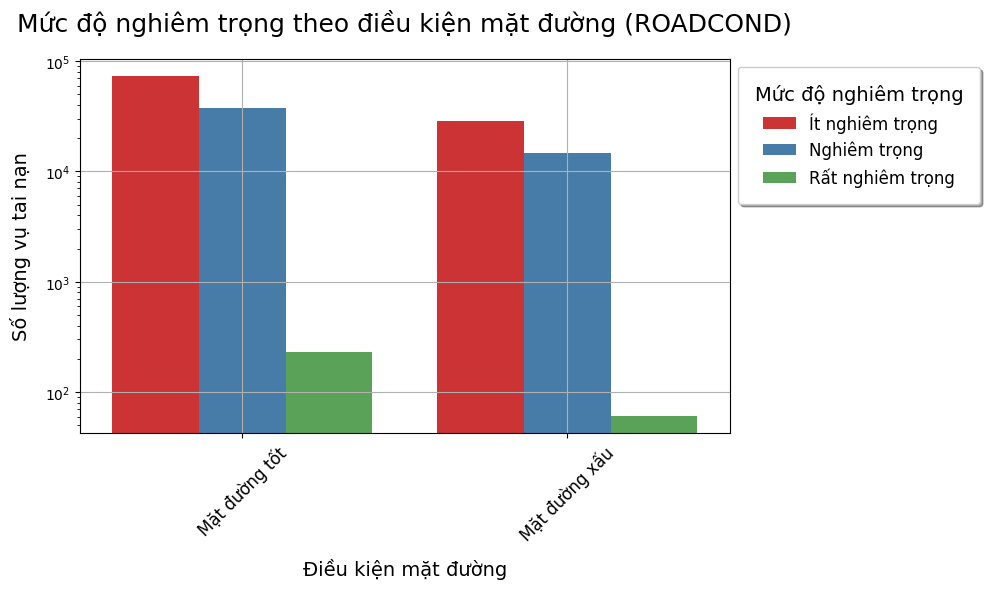

In [ ]:
# Ánh xạ các giá trị trong cột ROADCOND thành các nhóm
roadcond_mapping = {
    'Dry': 'Mặt đường tốt',
    'Clear': 'Mặt đường tốt',
    'Wet': 'Mặt đường xấu',
    'Flooded': 'Mặt đường xấu',
    'Snow': 'Mặt đường xấu',
    'Ice': 'Mặt đường xấu',
    'Under construction': 'Mặt đường có sự cố'
}

# Áp dụng ánh xạ vào cột ROADCOND
df_cleaned['ROADCOND_GROUP'] = df_cleaned['ROADCOND'].map(roadcond_mapping)

# Kiểm tra dữ liệu sau khi chia nhóm
print(df_cleaned['ROADCOND_GROUP'].value_counts())

# Vẽ biểu đồ phân tích mức độ nghiêm trọng theo điều kiện mặt đường (ROADCOND)
plt.figure(figsize=(10, 6))
sns.countplot(x='ROADCOND_GROUP', hue='SEVERITYCODE', data=df_cleaned, palette='Set1')
plt.title('Mức độ nghiêm trọng theo điều kiện mặt đường (ROADCOND)', fontsize=18, pad=20)
plt.xlabel('Điều kiện mặt đường', fontsize=14, labelpad=10)
plt.ylabel('Số lượng vụ tai nạn', fontsize=14, labelpad=10)

# Thêm thang đo log cho trục y
plt.yscale('log')

# Chỉnh sửa chú thích (legend)
plt.legend(title='Mức độ nghiêm trọng', labels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'],
           loc='upper left', fontsize=12, title_fontsize=14, bbox_to_anchor=(1, 1), shadow=True, borderpad=1)

# Xoay nhãn trục x cho dễ đọc
plt.xticks(rotation=45, fontsize=12)

# Bật lưới và hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()  # Đảm bảo không bị cắt khi di chuyển legend
plt.show()


Biểu đồ: Mức độ nghiêm trọng của tai nạn theo điều kiện mặt đường
* Biểu đồ này thể hiện số lượng vụ tai nạn theo các mức độ nghiêm trọng (ít nghiêm trọng, nghiêm trọng, và rất nghiêm trọng) trong hai điều kiện mặt đường khác nhau: "Mặt đường tốt" và "Mặt đường xấu".

Nhận xét về các nhóm điều kiện mặt đường:
* Mặt đường tốt:

Nhóm "Mặt đường tốt" có số lượng vụ tai nạn lớn nhất, đặc biệt là các vụ tai nạn ít nghiêm trọng (màu đỏ). Đây có thể là một chỉ báo cho thấy tai nạn xảy ra khá thường xuyên trong điều kiện đường tốt, nhưng phần lớn là những vụ tai nạn không quá nghiêm trọng.

Các vụ tai nạn nghiêm trọng (màu xanh dương) và rất nghiêm trọng (màu xanh lá cây) cũng có, nhưng ít hơn rất nhiều so với các tai nạn ít nghiêm trọng.

* Mặt đường xấu:

Trong nhóm "Mặt đường xấu", tai nạn nghiêm trọng (màu xanh dương) chiếm tỷ lệ cao hơn so với "Mặt đường tốt", cho thấy điều kiện đường xấu có thể làm tăng mức độ nghiêm trọng của tai nạn.

Tuy nhiên, số vụ tai nạn rất nghiêm trọng (màu xanh lá cây) trong nhóm "Mặt đường xấu" là rất ít, có thể do ảnh hưởng của các yếu tố khác như tốc độ, hay các yếu tố về lái xe và sự tương tác với môi trường.

* Tổng kết:
Biểu đồ cho thấy mặt đường xấu có thể làm gia tăng mức độ nghiêm trọng của tai nạn giao thông, nhưng không làm tăng tỷ lệ tai nạn rất nghiêm trọng.

Mặt đường tốt có số lượng tai nạn cao, nhưng phần lớn là tai nạn ít nghiêm trọng, điều này có thể do các yếu tố khác ngoài điều kiện mặt đường, chẳng hạn như hành vi lái xe hoặc sự cố không phải do đường xấu.




###5.2.3 biểu đồ phân tích mức độ nghiêm trọng của LIGHTCOND

LIGHTCOND_GROUP
Ánh sáng tốt    106030
Ánh sáng kém      5154
Name: count, dtype: int64


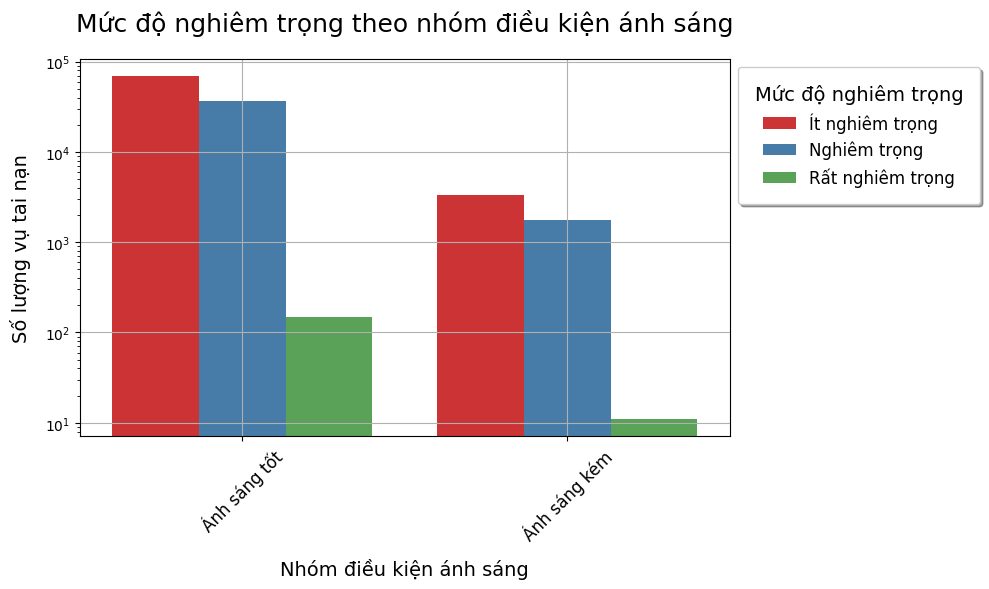

In [ ]:
# Tạo một từ điển ánh xạ nhóm ánh sáng
lightcond_mapping = {
    'Daylight': 'Ánh sáng tốt',
    'Dawn': 'Ánh sáng tốt',
    'Dusk': 'Ánh sáng kém',
    'Darkness': 'Ánh sáng kém',
}

# Áp dụng ánh xạ vào cột LIGHTCOND
df_cleaned['LIGHTCOND_GROUP'] = df_cleaned['LIGHTCOND'].map(lightcond_mapping)

# Kiểm tra kết quả sau khi gộp
print(df_cleaned['LIGHTCOND_GROUP'].value_counts())
# Phân tích mức độ nghiêm trọng theo nhóm LIGHTCOND
plt.figure(figsize=(10, 6))
sns.countplot(x='LIGHTCOND_GROUP', hue='SEVERITYCODE', data=df_cleaned, palette='Set1')
plt.title('Mức độ nghiêm trọng theo nhóm điều kiện ánh sáng', fontsize=18, pad=20)
plt.xlabel('Nhóm điều kiện ánh sáng', fontsize=14, labelpad=10)
plt.ylabel('Số lượng vụ tai nạn', fontsize=14, labelpad=10)

# Thêm thang đo log cho trục y
plt.yscale('log')

# Chỉnh sửa chú thích (legend)
plt.legend(title='Mức độ nghiêm trọng', labels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'],
           loc='upper left', fontsize=12, title_fontsize=14, bbox_to_anchor=(1, 1), shadow=True, borderpad=1)

# Xoay nhãn trục x cho dễ đọc
plt.xticks(rotation=45, fontsize=12)

# Bật lưới và hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()  # Đảm bảo không bị cắt khi di chuyển legend
plt.show()


###5.3 BIều độ phân tích mức độ nghêm trọng theo giờ trong ngày

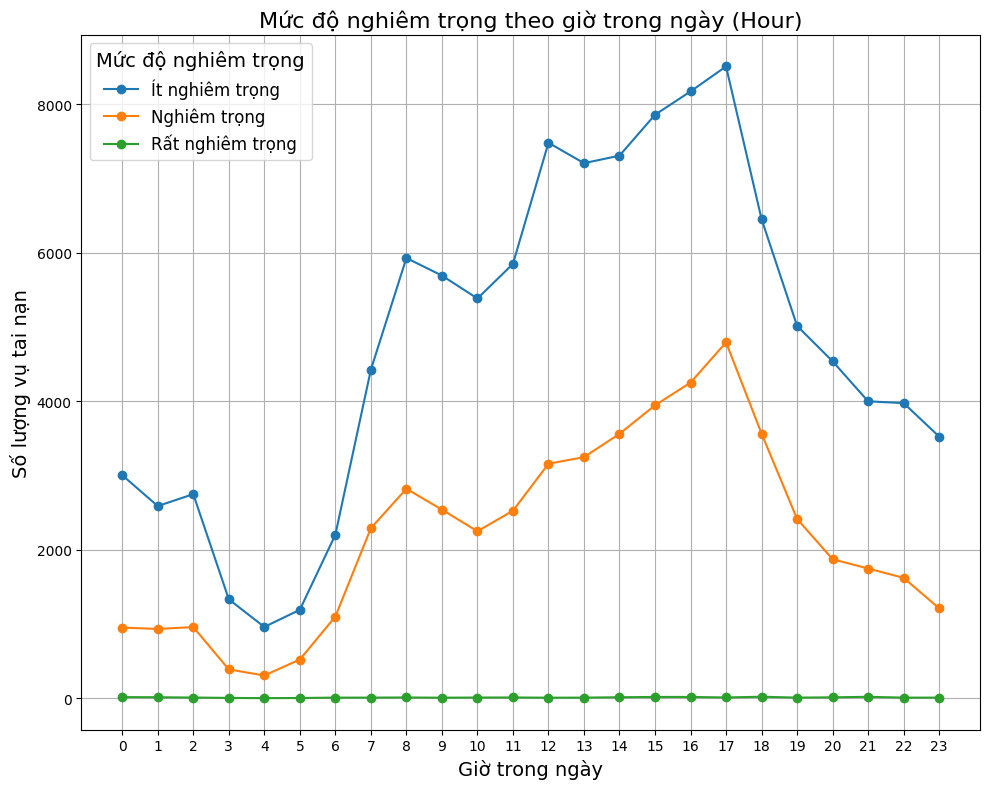

In [ ]:
# Tính số lượng vụ tai nạn theo giờ và mức độ nghiêm trọng
hourly_severity = df_cleaned.groupby(['Hour', 'SEVERITYCODE']).size().unstack().fillna(0)

# Vẽ biểu đồ đường cho mỗi mức độ nghiêm trọng
plt.figure(figsize=(10, 8))

# Vẽ một đường cho mỗi mức độ nghiêm trọng
for severity in hourly_severity.columns:
    plt.plot(hourly_severity.index, hourly_severity[severity], marker='o', label=severity)

# Tạo tiêu đề, trục và chú thích
plt.title('Mức độ nghiêm trọng theo giờ trong ngày (Hour)', fontsize=16)
plt.xlabel('Giờ trong ngày', fontsize=14)
plt.ylabel('Số lượng vụ tai nạn', fontsize=14)

# Hiển thị các nhãn giờ trên trục x
plt.xticks(range(0, 24))  # Đặt nhãn cho từng giờ từ 0 đến 23

# Chỉnh sửa chú thích (legend)
plt.legend(title='Mức độ nghiêm trọng', labels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'], loc='upper left', fontsize=12, title_fontsize=14)

# Bật lưới và hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()  # Đảm bảo không bị cắt khi di chuyển legend
plt.show()


### 5.4 BIều độ phân tích mức độ nghêm trọng theo ngày trong tuần

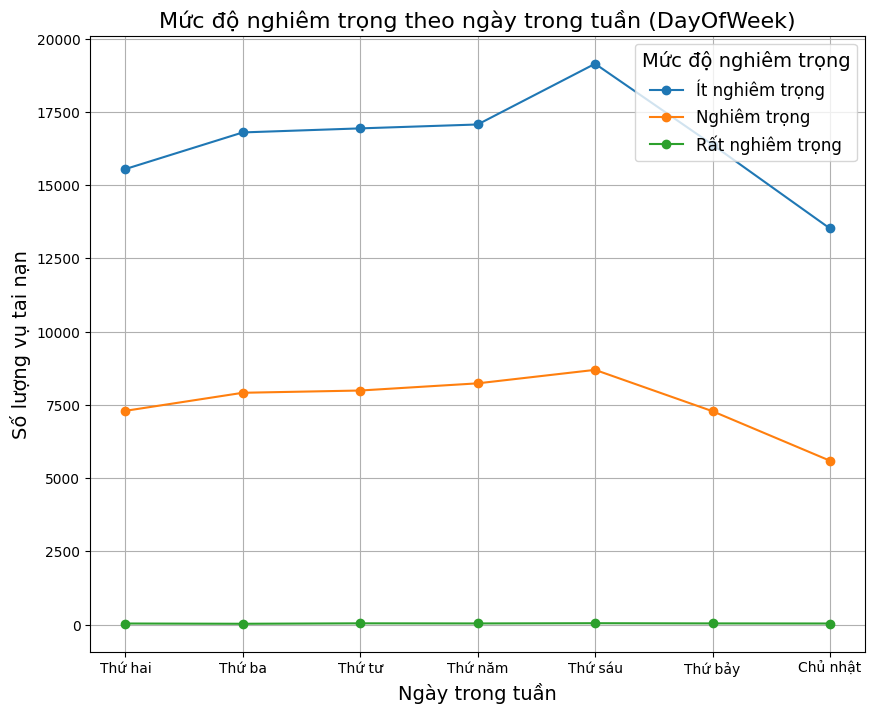

In [ ]:
# Tính số lượng vụ tai nạn theo ngày trong tuần và mức độ nghiêm trọng
daily_severity = df_cleaned.groupby(['DayOfWeek', 'SEVERITYCODE']).size().unstack().fillna(0)

# Vẽ biểu đồ đường cho mỗi mức độ nghiêm trọng
plt.figure(figsize=(10, 8))

# Vẽ một đường cho mỗi mức độ nghiêm trọng
for severity in daily_severity.columns:
    plt.plot(daily_severity.index, daily_severity[severity], marker='o', label=severity)

# Tạo tiêu đề, trục và chú thích
plt.title('Mức độ nghiêm trọng theo ngày trong tuần (DayOfWeek)', fontsize=16)
plt.xlabel('Ngày trong tuần', fontsize=14)
plt.ylabel('Số lượng vụ tai nạn', fontsize=14)

# Chỉnh sửa trục x để gán tên các ngày trong tuần
day_names = ['Thứ hai', 'Thứ ba', 'Thứ tư', 'Thứ năm', 'Thứ sáu', 'Thứ bảy', 'Chủ nhật']
plt.xticks(ticks=range(7), labels=day_names)

# Chỉnh sửa vị trí chú thích (legend)
plt.legend(title='Mức độ nghiêm trọng', labels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'],
           loc='upper right', fontsize=12, title_fontsize=14)  # Thay đổi vị trí ở đây

# Bật lưới và hiển thị biểu đồ
plt.grid(True)
plt.show()


### 5.5  BIều độ phân tích mức độ nghêm trọng theo ngày trong tháng

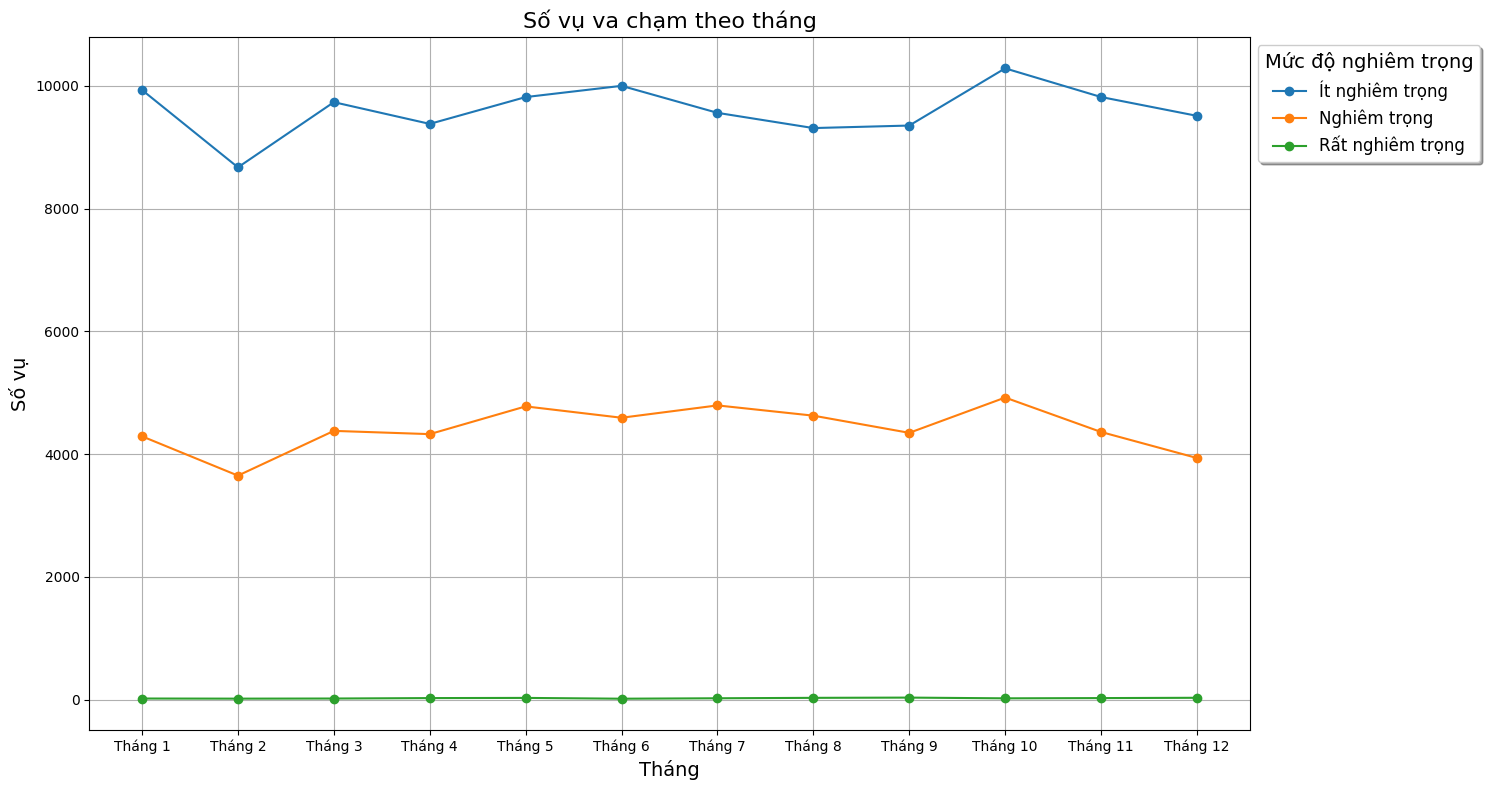

In [ ]:
# Tạo cột 'Month' từ dữ liệu thời gian INCDTTM
df_cleaned['Month'] = df_cleaned['INCDTTM'].dt.month

# Nhóm dữ liệu theo tháng và mức độ nghiêm trọng
monthly_severity = df_cleaned.groupby(['Month', 'SEVERITYCODE']).size().unstack().fillna(0)

# Vẽ biểu đồ đường cho số vụ tai nạn theo tháng
plt.figure(figsize=(15, 8))

# Vẽ một đường cho mỗi mức độ nghiêm trọng
for severity in monthly_severity.columns:
    plt.plot(monthly_severity.index, monthly_severity[severity], marker='o', label=f'Mức độ {severity}')

# Tạo tiêu đề, trục và chú thích
plt.title('Số vụ va chạm theo tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Số vụ', fontsize=14)

# Chỉnh sửa trục x để gán tên các tháng
month_names = ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12']
plt.xticks(ticks=range(1, 13), labels=month_names)

# Chỉnh sửa chú thích (legend) để không bị che khuất
plt.legend(title='Mức độ nghiêm trọng', labels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'],
           loc='upper left', fontsize=12, title_fontsize=14, bbox_to_anchor=(1, 1), shadow=True)

# Bật lưới và hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()  # Đảm bảo không bị cắt khi di chuyển legend
plt.show()

### 5.5 Ma trận tương quan (Correlation Matrix) - Heatmap

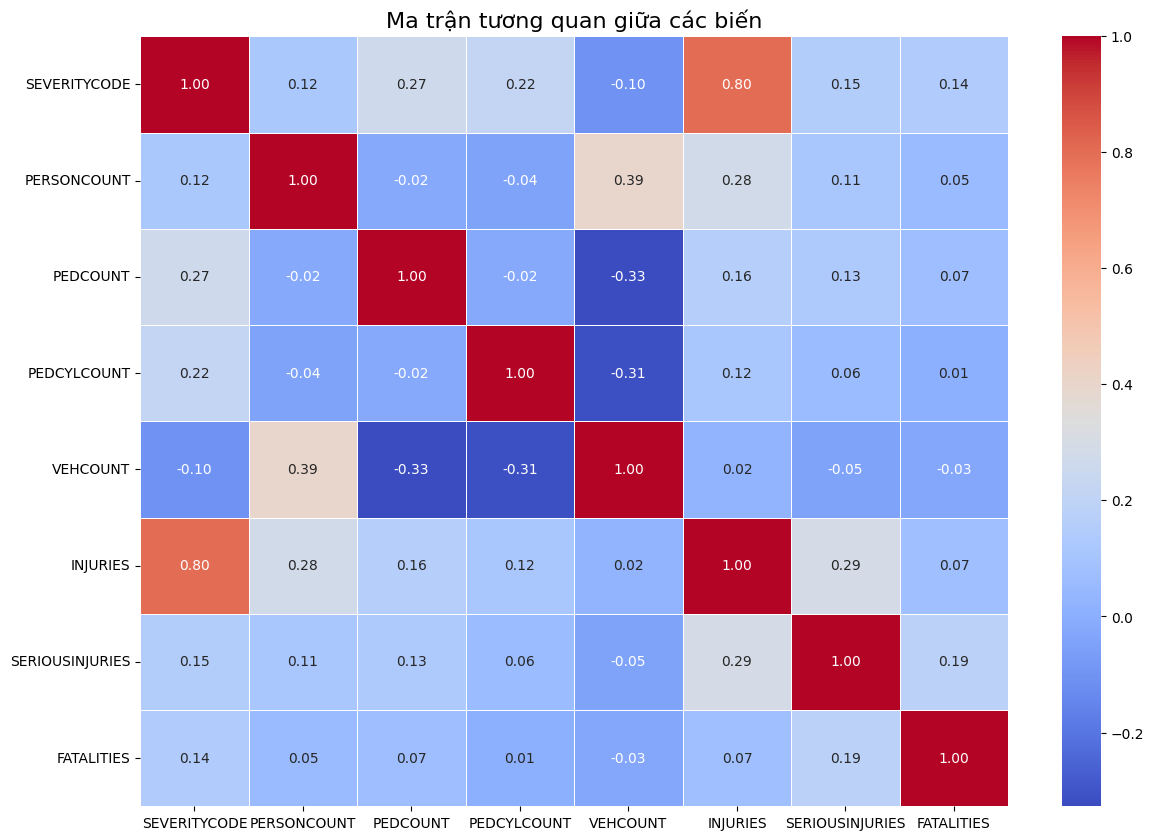

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lọc ra các cột số (numeric columns)
numeric_data = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Tính toán ma trận tương quan chỉ với các cột số
correlation_matrix = numeric_data.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(14, 10))  # Tạo hình ảnh với kích thước lớn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 10})

# Thiết lập tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến', fontsize=16)
plt.show()


###6.1 Xây dựng mô hình

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# df_cleaned là dữ liệu đã được tiền xử lý
X = df_cleaned.drop(columns=['SEVERITYCODE','INCDTTM', 'LOCATION'])  # Các đặc trưng
y = df_cleaned['SEVERITYCODE']  # Biến mục tiêu

# Mã hóa các biến phân loại thành dạng số (Label Encoding)
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của dữ liệu huấn luyện và kiểm tra
print(f"Kích thước của tập huấn luyện: {X_train.shape}")
print(f"Kích thước của tập kiểm tra: {X_test.shape}")

Kích thước của tập huấn luyện: (134964, 24)
Kích thước của tập kiểm tra: (33742, 24)


###6.2 Đánh giá các mô hình dự đoán

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5 , random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest - Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     23074
           2       1.00      1.00      1.00     10605
           3       1.00      1.00      1.00        63

    accuracy                           1.00     33742
   macro avg       1.00      1.00      1.00     33742
weighted avg       1.00      1.00      1.00     33742

Random Forest - Confusion Matrix:
 [[23074     0     0]
 [    2 10603     0]
 [    0     0    63]]


###6.2.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Tạo và huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr = lr_model.predict(X_test)

# Đánh giá mô hình
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     23074
           2       0.99      0.96      0.98     10605
           3       0.00      0.00      0.00        63

    accuracy                           0.99     33742
   macro avg       0.66      0.65      0.66     33742
weighted avg       0.99      0.99      0.99     33742

Logistic Regression - Confusion Matrix:
 [[23073     0     1]
 [  379 10223     3]
 [    3    60     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###6.2.3 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Tạo và huấn luyện mô hình SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Đánh giá mô hình
print("SVM - Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM - Classification Report:
               precision    recall  f1-score   support

           1       0.68      1.00      0.81     23074
           2       0.00      0.00      0.00     10605
           3       0.00      0.00      0.00        63

    accuracy                           0.68     33742
   macro avg       0.23      0.33      0.27     33742
weighted avg       0.47      0.68      0.56     33742

SVM - Confusion Matrix:
 [[23074     0     0]
 [10605     0     0]
 [   63     0     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###6.3 Đánh giá các mô hình

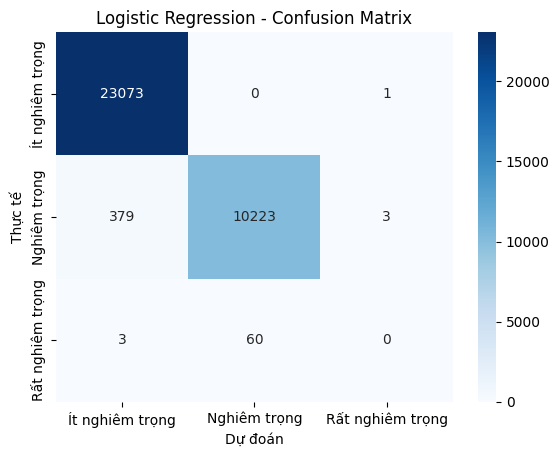

NameError: name 'y_pred_svm' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ confusion matrix cho Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'], yticklabels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

# Vẽ confusion matrix cho SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'], yticklabels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'])
plt.title('SVM - Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

# Vẽ confusion matrix cho Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'], yticklabels=['Ít nghiêm trọng', 'Nghiêm trọng', 'Rất nghiêm trọng'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Giả sử df_cleaned là dữ liệu đã được tiền xử lý
X = df_cleaned.drop(columns=['SEVERITYCODE','INCDTTM', 'LOCATION'])  # Các đặc trưng
y = df_cleaned['SEVERITYCODE']  # Biến mục tiêu

# Mã hóa các biến phân loại thành dạng số (Label Encoding)
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo đối tượng SMOTE
smote = SMOTE(random_state=42)

# Áp dụng SMOTE trên dữ liệu huấn luyện
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Kiểm tra kích thước của dữ liệu huấn luyện sau khi áp dụng SMOTE
print(f"Trước SMOTE - Kích thước của tập huấn luyện: {X_train.shape}")
print(f"Sau SMOTE - Kích thước của tập huấn luyện: {X_train_res.shape}")

### 2.1 Tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


### 2.2 Tạo và huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_res, y_train_res)

# Dự đoán trên tập kiểm tra
y_pred_lr = lr_model.predict(X_test)

# Đánh giá mô hình
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

### 2.3 Tạo và huấn luyện mô hình SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Đánh giá mô hình
print("SVM - Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



Trước SMOTE - Kích thước của tập huấn luyện: (134964, 27)
Sau SMOTE - Kích thước của tập huấn luyện: (276972, 27)
Random Forest - Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     23074
           2       1.00      1.00      1.00     10605
           3       1.00      1.00      1.00        63

    accuracy                           1.00     33742
   macro avg       1.00      1.00      1.00     33742
weighted avg       1.00      1.00      1.00     33742

Random Forest - Confusion Matrix:
 [[23074     0     0]
 [    2 10603     0]
 [    0     0    63]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.63      0.71     23074
           2       0.51      0.40      0.45     10605
           3       0.00      0.51      0.01        63

    accuracy                           0.56     33742
   macro avg       0.44      0.51      0.39     33742
weighted avg       0.71      0.56      0.63     33742

Logistic Regression - Confusion Matrix:
 [[14639  4132  4303]
 [ 3624  4269  2712]
 [   24     7    32]]
SVM - Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.37      0.49     23074
           2       0.34      0.27      0.30     10605
           3       0.00      0.40      0.00        63

    accuracy                           0.34     33742
   macro avg       0.35      0.35      0.26     33742
weighted avg       0.59      0.34      0.43     33742

SVM - Confusion Matrix:
 [[8610 5598 8866]
 [3538 2869 41